Task 5.1

Please use the dataaset in ../data_samples/hdf/NEONDSTowerTemperatureData.hdf5 and load data from the tower STER under Domain_10.

In [ ]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [16]:
file = 'C:\\Users/Sudha/Desktop/MEGI001-2101033-IntroEarthData/notebooks/data/data_samples/hdf/NEONDSTowerTemperatureData.hdf5'
hdf_file=h5py.File(file, 'r')
hdf_file

<HDF5 file "NEONDSTowerTemperatureData.hdf5" (mode r)>

In [18]:
list(hdf_file.keys())

['Domain_03', 'Domain_10']

In [20]:
d10=hdf_file['Domain_10']
list(d10)

['STER']

In [22]:
STER=d10['STER']
list(STER)

['min_1', 'min_30']

In [24]:
list(d10['STER']['min_30'])

['boom_1', 'boom_2', 'boom_3']

In [25]:
list(d10['STER']['min_1'])

['boom_1', 'boom_2', 'boom_3']

Task 5.2

Download some time series cyclical data (e.g. temperature on HDF5 dataset - see lectures 3 and 4) and fit sinusoidal function to it (use google for inspiration).

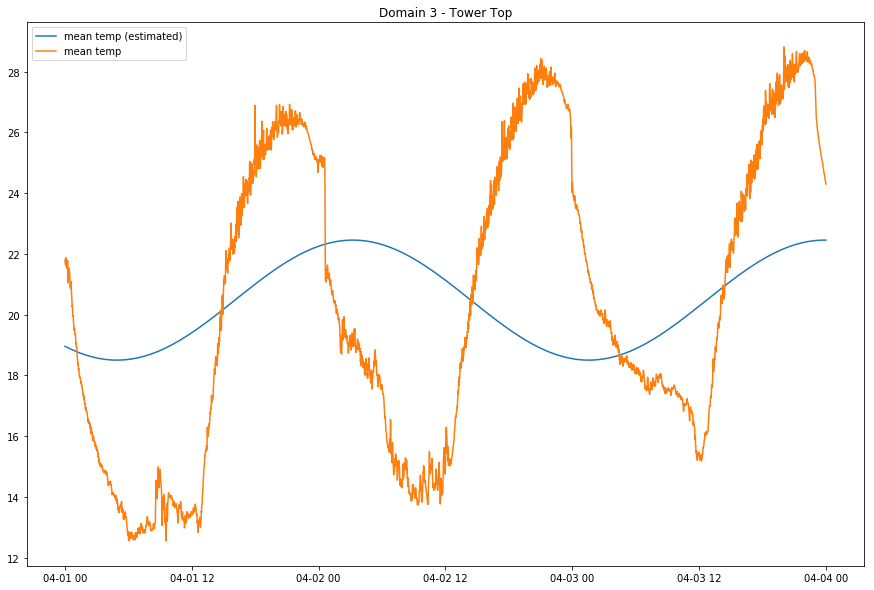

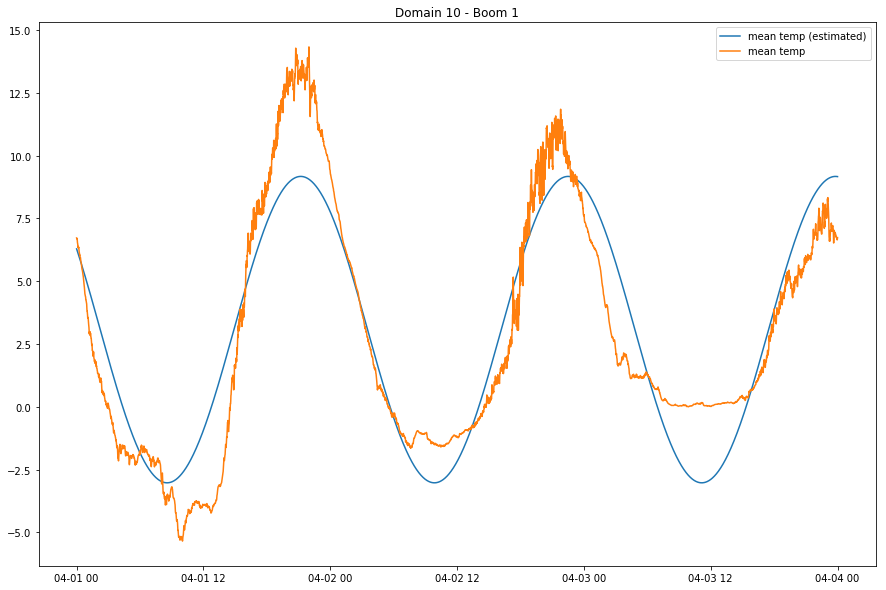

In [2]:
# Sin function of temperature data in HD5 dataset

import h5py
import math
import time

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import leastsq
from datetime import datetime

def sin_regression(x, y):
    # parameterized Eq: y = Asin(Bx+C)+D
    
    # convert datetime array to nparray of floats
    x1 = np.array([time.mktime(val.timetuple()) for val in x])
    x2 = np.interp(x1, (x1.min(), x1.max()), (-2*math.pi, 2*math.pi))
    
    # set up initial estimates for parameters
    A, B, C, D = np.mean(y), 1.0, 1.0, 5.0
    
    # optimisation func - sin regression params order: (A, B, C, D)
    optimzation_func = lambda x: x[0] * np.sin(x[1]*x2 + x[2]) + x[3] - y
    
    # perform sin regression using least squares
    A_HAT, B_HAT, C_HAT, D_HAT = leastsq(optimzation_func, [A, B, C, D])[0]
    y_hat = A_HAT * np.sin(B_HAT * x2 + C_HAT) + D_HAT
    
    return y_hat


def plot_mean_temp(temp_ds, title):
    """ Plots the mean temperatures of the given temp data set """
    ds = temp_ds['mean', 'date']
    temps = [record[0] for record in ds]
    dates = [record[1] for record in ds]
    
    dates_str_arr = ["".join([chr(y) for y in x[:-2]]) for x in dates]
    times = [datetime.strptime(item, '%Y-%m-%d %H:%M:%S') for item in dates_str_arr]
    
    temps_hat = sin_regression(times, temps)
    
    plt.figure(figsize=(15,10))
    plt.plot(times, temps_hat)
    plt.plot(times, temps)
    plt.title(title)
    plt.legend(['mean temp (estimated)', 'mean temp'], loc='best')
    plt.show()


def main():
    #hdf5_file_path = '../data_samples/hdf/NEONDSTowerTemperatureData.hdf5'
    hdf5_file_path = 'C:\\Users/Sudha/Desktop/MEGI001-2101033-IntroEarthData/notebooks/data/data_samples/hdf/NEONDSTowerTemperatureData.hdf5'
    file = h5py.File(hdf5_file_path, 'r')

    temp3_ds = file['Domain_03']['OSBS']['min_1']['tower_top']['temperature']
    temp10_ds = file['Domain_10']['STER']['min_1']['boom_1']['temperature']
    plot_mean_temp(temp3_ds, 'Domain 3 - Tower Top')
    plot_mean_temp(temp10_ds, 'Domain 10 - Boom 1')

main()

Task 5.3

Please perform the operations above (in a new notebook, properly renamed) for the labotory spectrum of Montmorillonite, i.e. montmorillonite-1292F35-RELAB.txt.
Please document any isssue/trouble

In [26]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [27]:
import numpy as np
import pandas as pd # we'll use pandas to load data
from scipy.interpolate import interp1d


In [31]:
filename = 'C:\\Users/Sudha/Desktop/MEGI001-2101033-IntroEarthData/notebooks/data/data_samples/spectral_data/montmorillonite-1292F35-RELAB.txt'
mont_data = pd.read_csv(filename , skipinitialspace=True, sep=' ',skiprows=3, header=None)

In [32]:
mont_data.head()

,0,1
0,0.3500,0.025839
1,0.3525,0.026137
2,0.3550,0.026436
3,0.3575,0.026805
4,0.3600,0.027175


In [34]:
#rename columns
mont_data = mont_data.rename(columns={0:'wavelength',1:'relabMontm'})
mont_data.head()

,wavelength,relabMontm
0,0.3500,0.025839
1,0.3525,0.026137
2,0.3550,0.026436
3,0.3575,0.026805
4,0.3600,0.027175


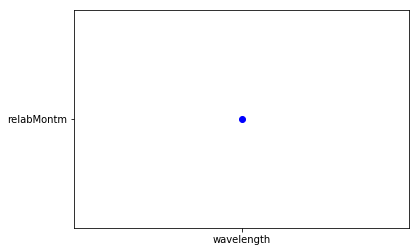

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
x ='wavelength'
y = 'relabMontm'
fig = plt.figure()
ax1 = fig.add_subplot(111) # create subplot
ax1.scatter(x, y, color='b') # plot scatter
#plt.xlabel('wavelength')# labels
#plt.ylabel('relabMontm')
plt.show()